#### Introduction
In this lab, you'll create and measure the relative performances of Random Forest and XGBoost regression models for predicting house prices using the California Housing Dataset.
'Performance' means both speed and accuracy.

#### Objective
- Use scikit-learn to implement Random Forest and XGBoost regression models
- Compare the performances of the two models

#### Flow
- Import libraries
- Understand data
- Split into training and test data
- Train random forest and XGBoost
- Performance check (training speed and prediction accuracy)
- Model Visualization

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Understand data

In [2]:
data = fetch_california_housing()
x = data.data
y = data.target
print(x.shape)  # 8 features in total and 20640 samples
print(y.shape)

x_df = pd.DataFrame(x)
x_df.isnull().value_counts()  # There is no missing data in x

y_series = pd.Series(y)
y_series.isnull().value_counts()  # There is no missing data in y

(20640, 8)
(20640,)


False    20640
Name: count, dtype: int64

#### Split into training and test data

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(16512, 8)
(4128, 8)


#### Train random forest/XGBoost and prediction and Performance check - Speed

In [4]:
# Define how many models we will use to train random forest and XGboost
n_estimators = 100

# Initialize random forest and XGBoost
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

# Train random forest and evaluate training speed
rf_train_start_time = time.time()
rf.fit(x_train, y_train)
rf_train_stop_time = time.time()

# Train XGBoost and evaluate training speed
xgb_train_start_time = time.time()
xgb.fit(x_train, y_train)
xgb_train_stop_time = time.time()

In [5]:
# Prediction with random forest and evaluate prediction speed
rf_predict_start_time = time.time()
rf_y_pred = rf.predict(x_test)
rf_predict_stop_time = time.time()

# Prediction with XGboost and evaluate prediction speed
xgb_predict_start_time = time.time()
xgb_y_pred = xgb.predict(x_test)
xgb_predict_stop_time = time.time()

#### Performance check - Accuracy

In [6]:
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)

mse_xgb = mean_squared_error(y_test, xgb_y_pred)
r2_xgb = r2_score(y_test, xgb_y_pred)

#### Performance Evaluation summary

In [7]:
print(f'Training time for random forest is {(rf_train_stop_time - rf_train_start_time):.4f}')
print(f'Training time for XGBoost is {(xgb_train_stop_time - xgb_train_start_time):.4f}')
# print('See a huge training time difference between random forest and XGBoost')

print(f'Prediction time for random forest is {(rf_predict_stop_time - rf_predict_start_time):.4f}')
print(f'Prediction time for XGBoost is {(xgb_predict_stop_time - xgb_predict_start_time):.4f}')

print(f'MSE value of random forest is {mse_rf:.4f}; R squared of random forest is {r2_rf:.4f}')
print(f'MSE value of XGBoost is {mse_xgb:4f}; R squared of XGBoost is {r2_xgb:.4f}')

Training time for random forest is 20.7878
Training time for XGBoost is 0.3874
Prediction time for random forest is 0.2908
Prediction time for XGBoost is 0.0113
MSE value of random forest is 0.2554; R squared of random forest is 0.8051
MSE value of XGBoost is 0.222590; R squared of XGBoost is 0.8301


#### Model Visualization 

Both models performed very well. Most of their predictions fall within a standard deviation of the target. Interestingly, random forest "respects" the upper bound (the maximum value) present in the target by staying within its limits, while XGBoost "overshoots", or exceeds this limit.


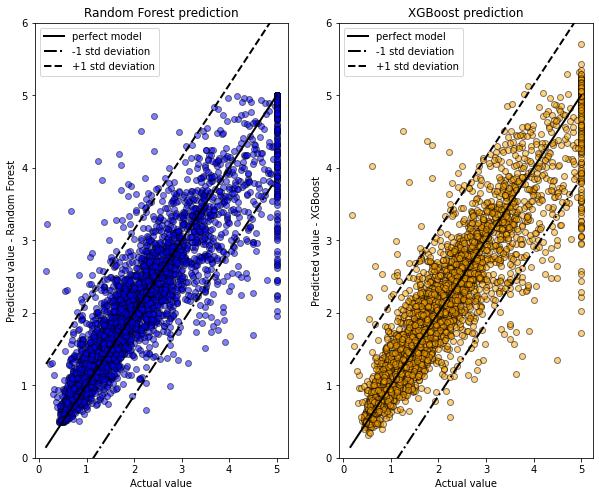

In [18]:
y_test_std = np.std(y_test)
y_test_std

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(y_test, rf_y_pred, alpha=0.5, color="blue", ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - y_test_std, y_test.max() - y_test_std], 'k-.', lw=2, label="-1 std deviation")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + y_test_std, y_test.max() + y_test_std], 'k--', lw=2, label="+1 std deviation")
plt.ylim(0,6)
plt.xlabel('Actual value')
plt.ylabel('Predicted value - Random Forest')
plt.legend()
plt.title('Random Forest prediction')

plt.subplot(1,2,2)
plt.scatter(y_test, xgb_y_pred, alpha=0.5, color='orange', ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - y_test_std, y_test.max() - y_test_std], 'k-.', lw=2, label="-1 std deviation")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + y_test_std, y_test.max() + y_test_std], 'k--', lw=2, label="+1 std deviation")
plt.ylim(0,6)
plt.xlabel('Actual value')
plt.ylabel('Predicted value - XGBoost')
plt.legend()
plt.title('XGBoost prediction')

print('Both models performed very well. Most of their predictions fall within a standard deviation of the target. Interestingly, random forest "respects" the upper bound (the maximum value) present in the target by staying within its limits, while XGBoost "overshoots", or exceeds this limit.')